In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Klassifizieren von Klamotten mit dem Fashion MNIST Dataset:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
# Insgesamt besteht das Dataset aus 9 verschiedenen Klassen:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


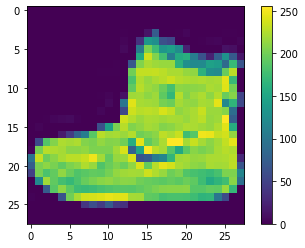

In [8]:
# 1. Vorverarbeitung der Daten:
# Die Bilder sind Greyscaled (0-255) besser für uns: 0 - 1

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Skalieren der Werte:
train_images = train_images / 255.0
test_images = test_images / 255.0

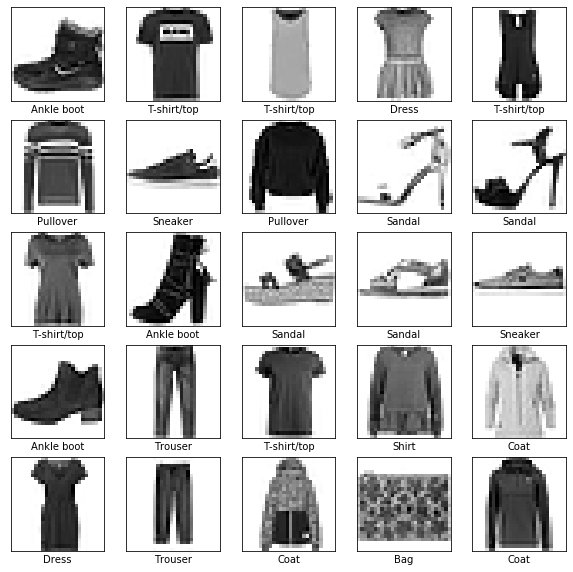

In [10]:
# Preview der ersten 25 Bilder:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
# Flatten = Umwandeln aus 2D Array [28, 28] in ein 1D 28 * 28 = 784 Array

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.4956 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.3740 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 2s 974us/step - loss: 0.3337 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.3133 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.2944 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 2s 979us/step - loss: 0.2824 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.2684 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.2590 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2490 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/st

In [15]:
# Evaluieren:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3364 - accuracy: 0.8850

Test accuracy: 0.8849999904632568


In [17]:
# Test acc < Train acc = Overfitting! Aber ein Unterschied von 3% ist noch recht gering. 
# Verwendenen des Modells, dazu hinzufügen eines weiteren Layers um die Wahrscheinlichkeit der jeweiligen Klasse zu bekommen (SOFTMAX)

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [18]:
print(predictions[0])
print(np.argmax(predictions[0]))

[1.6051741e-06 3.2984876e-10 5.4502522e-09 3.4159179e-11 1.6309261e-08
 2.8158011e-04 1.3442464e-06 2.3303781e-02 2.7017140e-07 9.7641140e-01]
9


In [19]:
# Copy pasta von Visualisierung:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

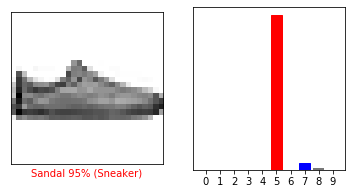

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

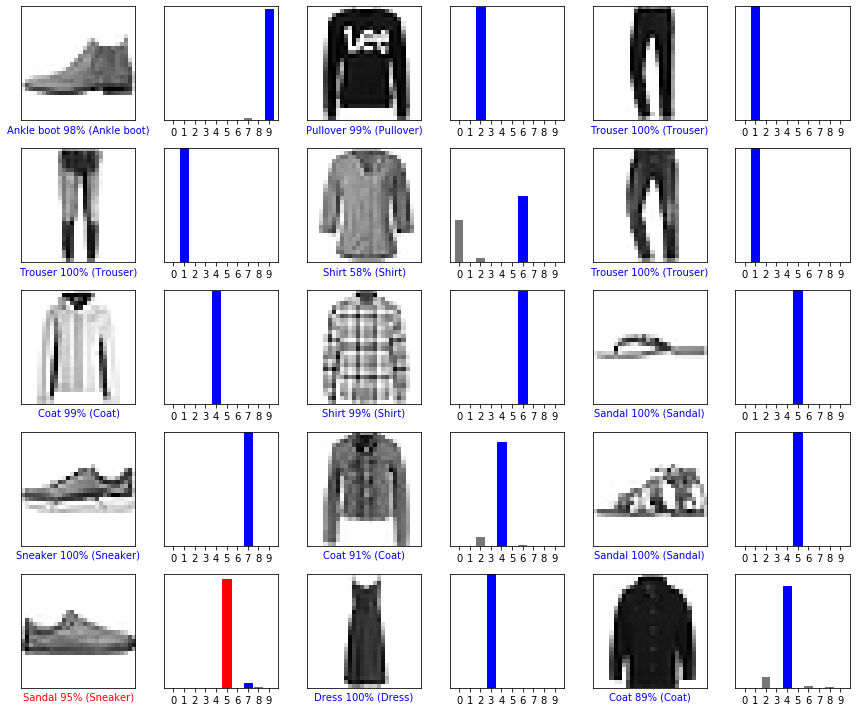

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

    plt.tight_layout()
plt.show()

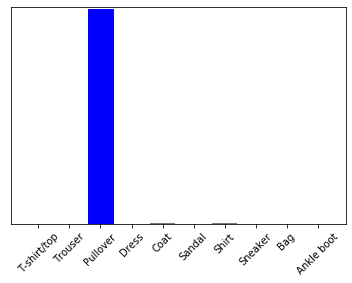

In [23]:
# Vorhersagen einzelner Bilder:

img = test_images[1]

# Keras predicted nur auf batches, weshalb die Liste..
img = (np.expand_dims(img, 0))

predictions_single = probability_model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)

_ = plt.xticks(range(10), class_names, rotation=45)